# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Preprocessing


In [3]:
# now we load the dataset to the Pandas Dataframe
heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Now check the number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Checking for the missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Now checking the distribution of the Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1---> Defective Heart


0---> Healthy Heart

In [13]:
# Spliting the features and Target 
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [14]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# Data Visualization

<ipython-input-17-de42048e062f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart_data.hist(ax = ax)


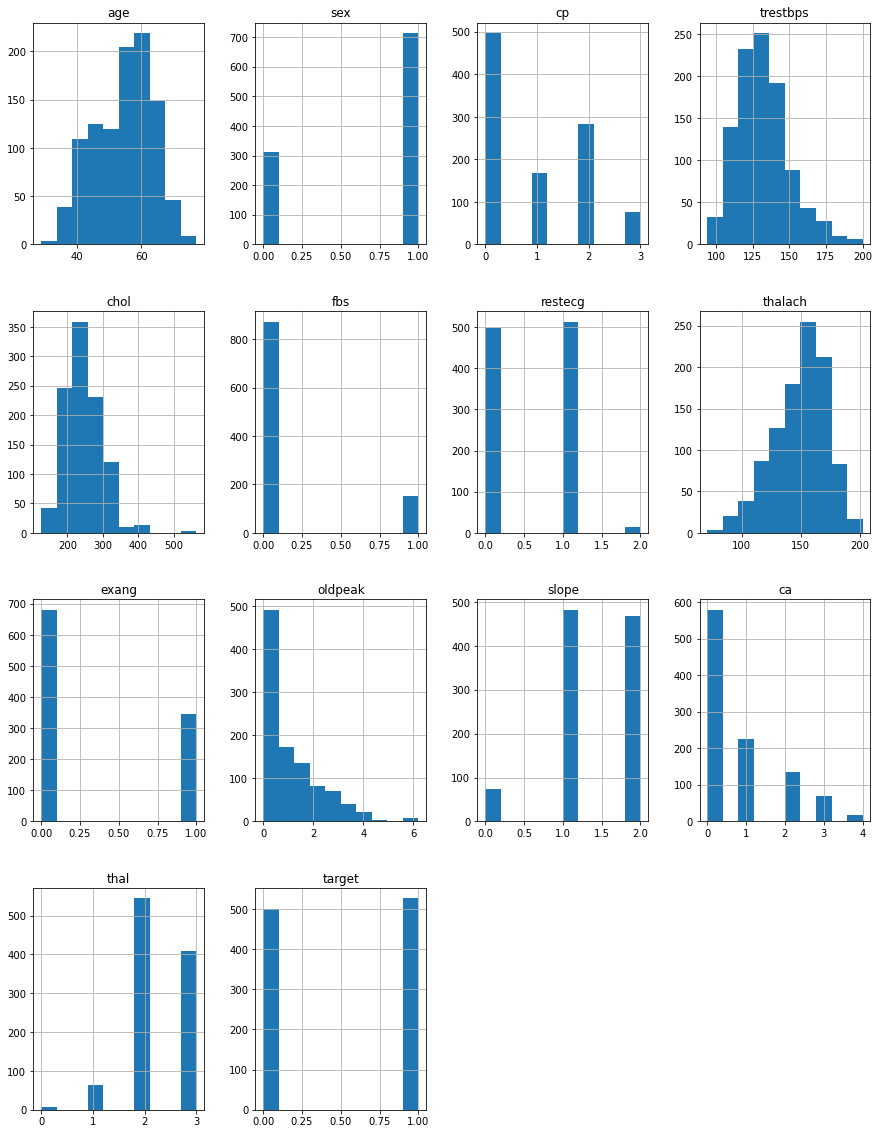

In [17]:
# Checking the Distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)
plt.show()

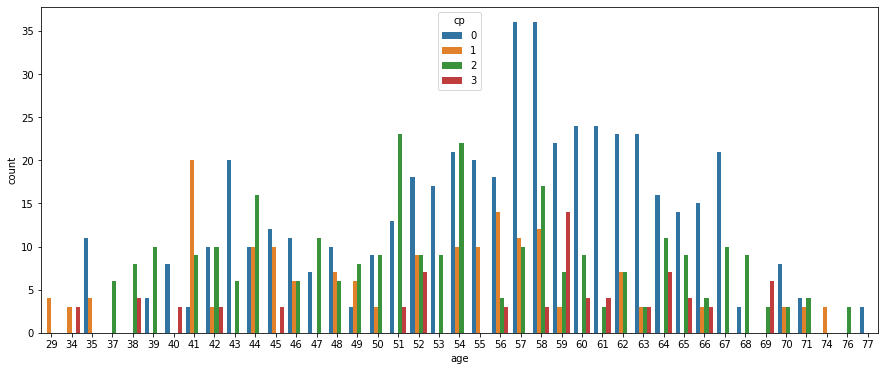

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart_data,hue='cp')
plt.show()

<AxesSubplot:xlabel='cp', ylabel='trestbps'>

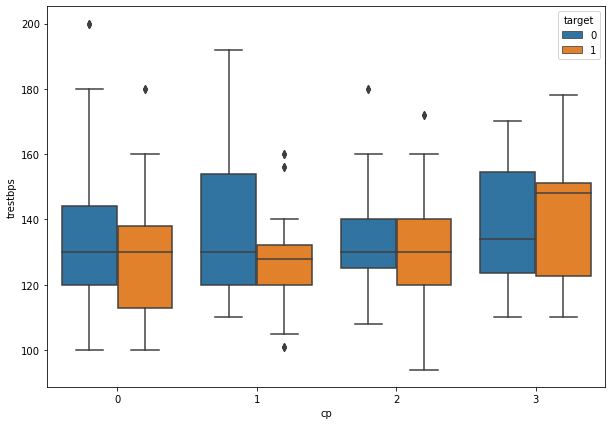

In [21]:
#Based on retsing blood pressure
plt.figure(figsize=(10,7))
sns.boxplot(data=heart_data,x='cp',y='trestbps',hue='target')

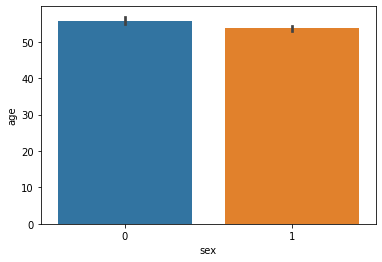

In [22]:
sns.barplot(x='sex',y='age',data=heart_data)
plt.show()

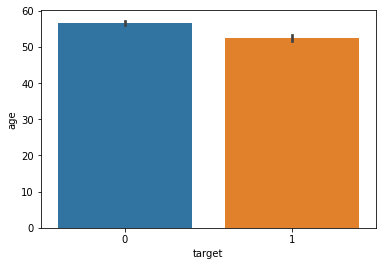

In [24]:
sns.barplot(x='target',y='age',data=heart_data)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

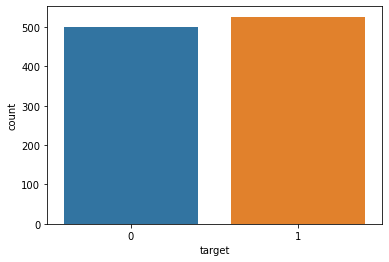

In [25]:
sns.countplot(x='target',data=heart_data)

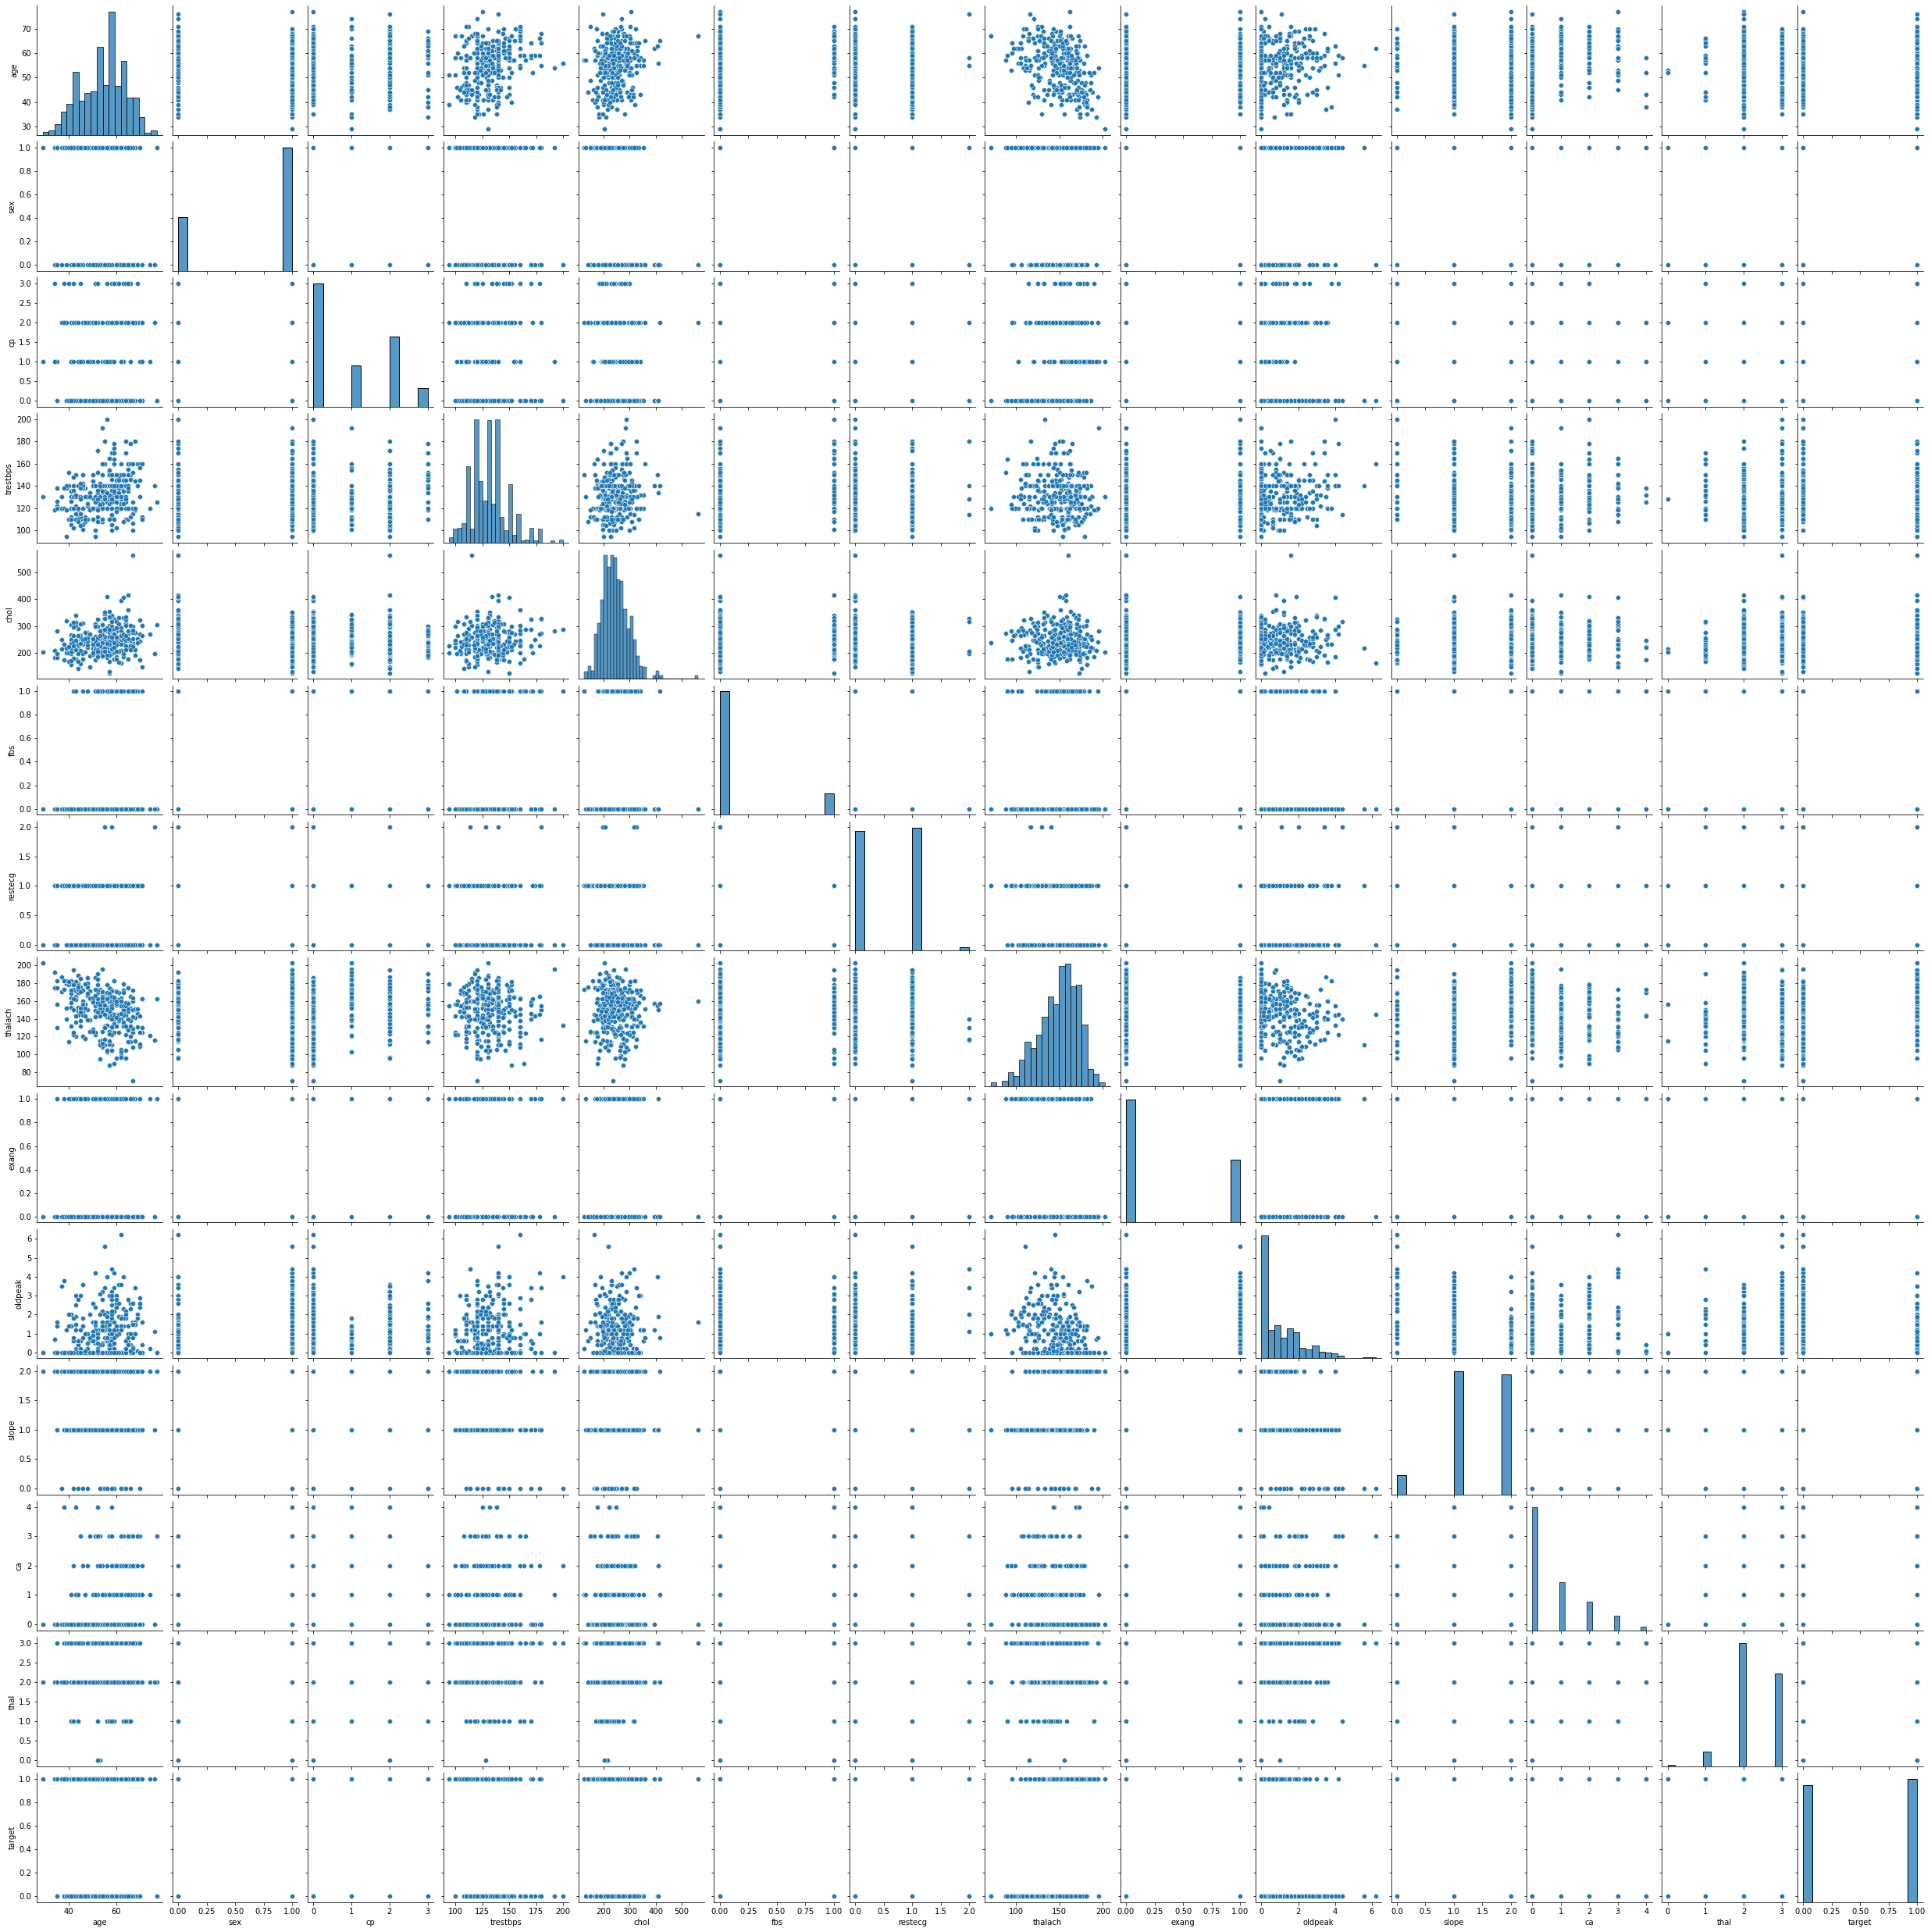

In [26]:
sns.pairplot(data=heart_data)

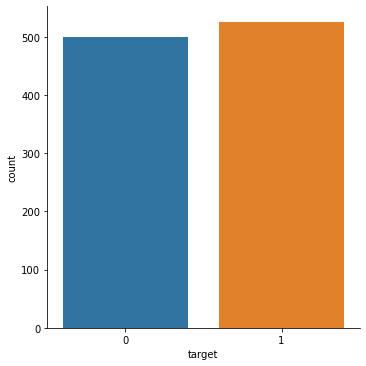

In [27]:
sns.catplot(x='target',data=heart_data,kind='count')

In [28]:
### CORRELATION
# 1. Positive Correlation
# 2. Negative Correlation

In [29]:
correlation=heart_data.corr()

<AxesSubplot:>

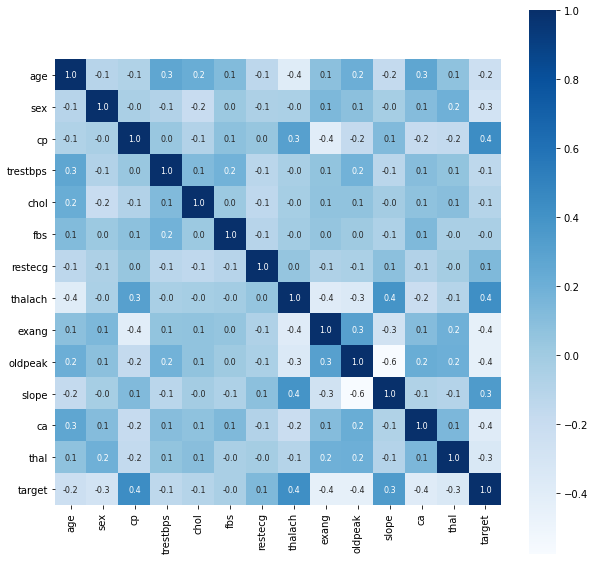

In [30]:
### Constructing the heatmap to understand the correlation between the column
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Model Training

Logistic Regression

In [33]:
model=LogisticRegression()

In [34]:
# Training the Logistic Regression with Training Data
model.fit(X_train,Y_train)

c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## MODEL EVALUATION

### Accuracy Score

In [35]:
# ACCURACY ON TRAINING DATA
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [36]:
print("Accuracy on Training Data",training_data_accuracy)

Accuracy on Training Data 0.8524390243902439


In [37]:
# ACCURACY ON TEST DATA
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [38]:
print("Accuracy on Test Data",test_data_accuracy)

Accuracy on Test Data 0.8048780487804879


# Confusion Matrix on this test data


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,X_test_prediction)


array([[72, 28],
       [12, 93]], dtype=int64)

In [57]:
# Confusion matrix Metrics
from sklearn.metrics import classification_report
matrix=classification_report(Y_test,X_test_prediction)
print("Classification Report",matrix)


Classification Report               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# BUILDIND A PREDICTED SYSTEM


In [44]:
input_data=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)



# Changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the data as we predict the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The Person Does not have a Heart Disease')
else:
    print('The Person have a Heart Disease')

[1]
The Person have a Heart Disease


In [45]:
input_data=(54,1,0,122,286,0,0,116,1,3.2,1,2,2)



# Changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the data as we predict the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The Person Does not have a Heart Disease')
else:
    print('The Person have a Heart Disease')

[0]
The Person Does not have a Heart Disease
